In [1]:
import pandas as pd
import pickle
import random

import numpy as np
import torch
#import ninja
from backend.disentangle_concepts import *
%load_ext autoreload
%autoreload 2

annotations_file = './data/annotated_files/annotations_parallel_seeds0000-10000.pkl'
with open(annotations_file, 'rb') as f:
    annotations = pickle.load(f)

ann_df = pd.read_csv('./data/annotated_files/sim_seeds0000-10000.csv')
concepts = './data/concepts.txt'

with open(concepts) as f:
    labels = [line.strip() for line in f.readlines()]

model = torch.load('./data/model_files/pytorch_model.bin', map_location=torch.device('cpu'))
concept_id = 'abstract'
separation_vector, number_important_features, important_nodes = get_separation_space(concept_id, annotations, ann_df, method='LR', samples=150, C=0.1)

/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value fo

Val performance logistic regression 0.6166666666666667


In [2]:
print(number_important_features, important_nodes)

10 [ 27  42  93 161 188 190 230 238 406 473]


In [3]:
seed = random.randint(0,10000)
original_image_vec = annotations['z_vectors'][seed]
img = generate_original_image(original_image_vec, model)

images, lambdas = regenerate_images(model, original_image_vec, separation_vector, min_epsilon=-(int(2)), max_epsilon=int(2))

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


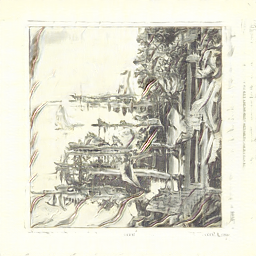

In [4]:
img

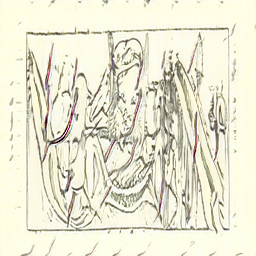

In [5]:
images[0]

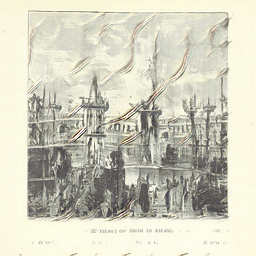

In [6]:
images[-1]

In [7]:
with open(annotations_file, 'rb') as f:
        annotations = pickle.load(f)
annotations['fname'][:10], annotations['z_vectors'][:1],# annotations['annotations'][:5]

(['/home/ludosc/data/stylegan-7000-captures/seed0000.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0001.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0002.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0003.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0004.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0005.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0006.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0007.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0008.png',
  '/home/ludosc/data/stylegan-7000-captures/seed0009.png'],
 [array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
          -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
           0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
           0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
          -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
          -1.45436567,  0.04575852

In [8]:
seed = random.randint(0,10000)
original_image_vec = annotations['z_vectors'][seed]
img = generate_original_image(original_image_vec, model)

In [9]:
concept_id = "Readymade"

History Painting             0.000
Genre Painting               0.000
Still Life                   0.000
Portraits                    0.000
Landscapes                   0.000
Op Art                       0.000
Institutional Critique       0.000
Arte Povera                  0.000
Body Art                     0.000
Trompe-l'oeil                0.001
ancient                      0.001
Trompe-l'oeil.1              0.001
Renaissance                  0.003
Iconoclasm                   0.004
Baroque                      0.005
Lithography                  0.005
Woodcut                      0.006
etching                      0.171
Intaglio                     0.799
Unnamed: 0                3272.000
Name: 3272, dtype: float64


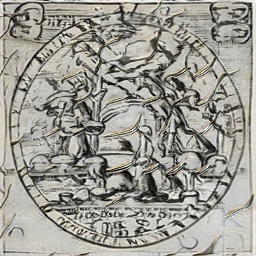

In [10]:
samples = 500 
abstracts = np.array([float(ann) for ann in ann_df[concept_id]])

repr_idxs = list(np.argsort(abstracts))[:samples]
abstract_idxs = list(np.argsort(abstracts))[-samples:]
    
z = annotations['z_vectors'][abstract_idxs[0]]
img = generate_original_image(z, model)
if 'ID' in ann_df.columns:
    ann_df = ann_df.drop('ID', axis=1)
print(ann_df.loc[abstract_idxs[0], :].sort_values()[-20:])
img

In [11]:
ann_df['abstract'].value_counts()

0.000    8388
0.001     698
0.002     228
0.003     150
0.004      72
         ... 
0.061       1
0.047       1
0.040       1
0.129       1
0.093       1
Name: abstract, Length: 78, dtype: int64

Unnamed: 0                0.000
Minimalism                0.000
Pop Art                   0.000
Abstract Expressionism    0.000
Surrealism                0.000
                          ...  
rural                     0.013
Western                   0.019
Genre Painting            0.047
Lithography               0.421
etching                   0.456
Name: 0, Length: 122, dtype: float64


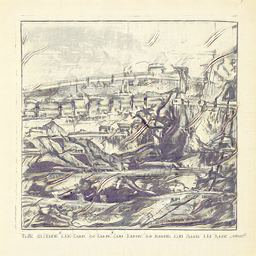

In [12]:
z = annotations['z_vectors'][repr_idxs[0]]
img = generate_original_image(z, model)
print(ann_df.loc[repr_idxs[0], :].sort_values())
img

In [13]:
for col in ann_df.columns:
    if '1' in col:
        print(col)

Readymade.1
Trompe-l'oeil.1


In [71]:
concepts = ['Op Art', 'Minimalism', 'Surrealism', 'Baroque', 'Lithography', 'Woodcut', 'etching', 'Intaglio',]

vectors, projection, nodes_in_common = get_concepts_vectors(concepts, annotations, ann_df, method='LR', samples=150, C=0.1)

Val performance logistic regression 0.5333333333333333
Val performance logistic regression 0.5166666666666667
Val performance logistic regression 0.5666666666666667
Val performance logistic regression 0.55
Val performance logistic regression 0.7166666666666667
Val performance logistic regression 0.7166666666666667
Val performance logistic regression 0.7333333333333333
Val performance logistic regression 0.6


In [72]:
print(nodes_in_common)

set()


In [73]:
projection

array([[ 8.758678 , -4.156585 ,  5.84721  ],
       [ 7.854671 , -3.4953308,  5.433208 ],
       [ 6.72086  , -2.368858 ,  6.992235 ],
       [ 7.3363338, -1.824405 ,  7.7717323],
       [11.700093 , -2.3216834,  6.0401044],
       [10.896009 , -2.7083495,  7.270021 ],
       [10.66911  , -1.9108422,  5.470016 ],
       [10.590766 , -1.2934836,  7.080463 ]], dtype=float32)

In [74]:
import plotly

In [75]:
x = projection[:, 0]
x

array([ 8.758678 ,  7.854671 ,  6.72086  ,  7.3363338, 11.700093 ,
       10.896009 , 10.66911  , 10.590766 ], dtype=float32)

In [76]:
import plotly.graph_objects as go

# Generate example data
x = projection[:, 0]  # x-coordinates of vectors
y = projection[:, 1]  # y-coordinates of vectors
z = projection[:, 2]  # z-coordinates of vectors
data = []

for i in range(len(x)):
    # Create a 3D scatter plot
    data.append(go.Scatter3d(
        x=[0, x[i]],  # Start at x = 0
        y=[0, y[i]],  # Start at y = 0
        z=[0, z[i]],  # Start at z = 0
        mode='lines',
        marker=dict(size=5),
        line=dict(width=2),
        hovertext=concepts[i],
        text=concepts[i],
        name=concepts[i],
        showlegend=True,
    ))

# layout = go.Layout(margin = dict( l = 0,
#                                   r = 0,
#                                   b = 0,
#                                   t = 0)
#                   )
fig = go.Figure(data=data)
# plot(fig,filename="vector.html",auto_open=False,image='png',image_height=800,image_width=1500)
# # Set the title
fig.update_layout(title='3D Vectors')
# Set the axis labels
fig.update_layout(scene=dict(
    xaxis=dict(title='X', range=[-10, 10],),
    yaxis=dict(title='Y', range=[-10, 10],),
    zaxis=dict(title='Z', range=[-10, 10],),
))

# Show the plot
fig.show()


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

edges = []
for i in range(len(concepts)):
    for j in range(len(concepts)):
        if i != j:
            print(f'Similarity between {concepts[i]} and {concepts[j]}')
            similarity = cosine_similarity(vectors[i,:].reshape(1, -1), vectors[j,:].reshape(1, -1))
            print(np.round(similarity[0][0], 3))
            edges.append((concepts[i], concepts[j], np.round(similarity[0][0], 3)))


Similarity between Op Art and Minimalism
0.432
Similarity between Op Art and Surrealism
-0.086
Similarity between Op Art and Baroque
-0.047
Similarity between Op Art and Lithography
0.054
Similarity between Op Art and Woodcut
0.125
Similarity between Op Art and etching
0.117
Similarity between Op Art and Intaglio
0.094
Similarity between Minimalism and Op Art
0.432
Similarity between Minimalism and Surrealism
-0.042
Similarity between Minimalism and Baroque
-0.052
Similarity between Minimalism and Lithography
0.046
Similarity between Minimalism and Woodcut
0.069
Similarity between Minimalism and etching
0.1
Similarity between Minimalism and Intaglio
0.03
Similarity between Surrealism and Op Art
-0.086
Similarity between Surrealism and Minimalism
-0.042
Similarity between Surrealism and Baroque
0.067
Similarity between Surrealism and Lithography
-0.235
Similarity between Surrealism and Woodcut
-0.16
Similarity between Surrealism and etching
-0.171
Similarity between Surrealism and Intag

In [80]:
import matplotlib.pyplot as plt
import networkx as nx

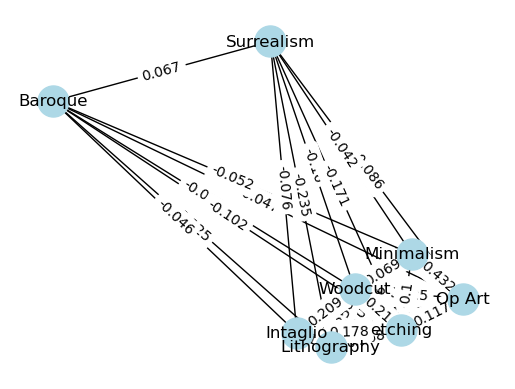

In [81]:
# Create an empty graph
G = nx.Graph()

# Add edges with weights to the graph
for edge in edges:
    node1, node2, weight = edge
    G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

# Display the graph interactively
plt.axis('off')
plt.show()

In [83]:
import nxviz as nv


/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning:


nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)




In [91]:
from pyvis.network import Network

In [103]:
net = Network(notebook=True, height="750px", width="100%",)
for e in edges:
    src = e[0]
    dst = e[1]
    w = e[2]

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, value=w, title=src + ' to ' + dst + ' similarity ' +str(w))
print(net)

# neighbor_map = net.get_adj_list()

# # add neighbor data to node hover data
# for node in net.nodes:
#     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
#     node["value"] = len(neighbor_map[node["id"]])


# net.toggle_physics(True)
net.show('nx.html')

{
    "Nodes": [
        "Op Art",
        "Minimalism",
        "Surrealism",
        "Baroque",
        "Lithography",
        "Woodcut",
        "etching",
        "Intaglio"
    ],
    "Edges": [
        {
            "value": 0.432,
            "title": "Op Art to Minimalism similarity 0.432",
            "from": "Op Art",
            "to": "Minimalism"
        },
        {
            "value": -0.086,
            "title": "Op Art to Surrealism similarity -0.086",
            "from": "Op Art",
            "to": "Surrealism"
        },
        {
            "value": -0.047,
            "title": "Op Art to Baroque similarity -0.047",
            "from": "Op Art",
            "to": "Baroque"
        },
        {
            "value": 0.054,
            "title": "Op Art to Lithography similarity 0.054",
            "from": "Op Art",
            "to": "Lithography"
        },
        {
            "value": 0.125,
            "title": "Op Art to Woodcut similarity 0.125",
            "fr

In [104]:
seed = random.randint(0,10000)
original_image_vec = annotations['z_vectors'][seed]
img = generate_original_image(original_image_vec, model)

In [105]:
z_0 = original_image_vec + 2 * vectors[0] + 2 * vectors[1]
        

In [107]:
img = model(z_0.to(), None, truncation_psi=0.7, noise_mode='const')
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
        

AttributeError: 'numpy.ndarray' object has no attribute 'to'